<a href="https://colab.research.google.com/github/Itzhak838/ANN1/blob/main/DNN_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


use the MNIST data set, which consists of 60,000 photos of handwritten numbers. However, for this task, we are going to use the MNIST Fashion dataset, which consists of 60,000 28 x 28 grayscale images of Zalando article fashion images, all classified across 10 different classes.
The dataset is split between a training and a test set automatically (60,000 images in training, 10,000 images in test). The x-axis data are the images and the y-axis data are the labels.



To make this more useful for working with, it is also a good idea to create a validation data set so we can ensure the model isn’t overfitting:

In [5]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

The y-axis data is just a series of numbers associated with each class label, therefore we need to define the class labels manually:

In [6]:
class_names = ["T-shirt/top", "Truser", "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Bag" , "Ankle boot" ]

To get an idea of what the dataset actually represents we can use a simple loop and Matplotlib:

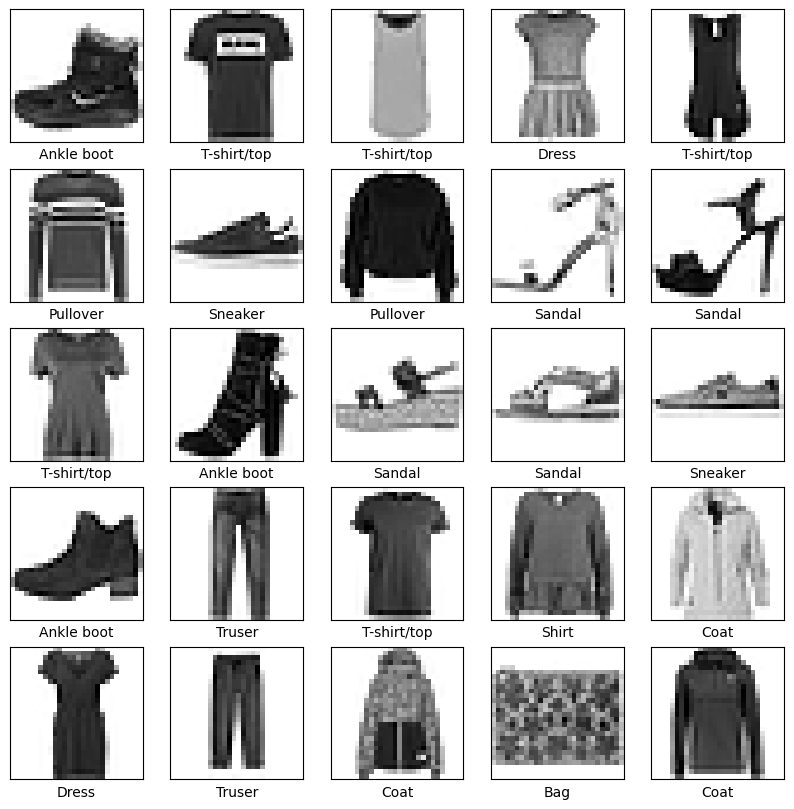

In [7]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train_full[i], plt.cm.binary)
  plt.xlabel(class_names[y_train_full[i]])
plt.show()

The usual way of normalizing a dataset is to scale the features, and this is done by substacting the mean from each feature and dividing by the standard deviation. This will put the features on the same scale somewhere between 0 — 1.

As we are working with 28 x 28 NumPy arrays representing each image and each pixel in the array has an intensity somewhere between 1 — 255, a simpler way of getting all of these images on a scale between 0–1 is to divide each array by 255.

In [8]:
X_valid, X_train = X_valid/255. , X_train / 255.

Building the neural network image classifier:
In order to build the model, we have to specify its structure using Keras’ syntax. As mentioned above, it is very similar to Scikit-Learn and so it should be recognisable if you are familiar with that package. The code for building the model is as follows:

In [9]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape = [28, 28]),
keras.layers.Dense(300, activation = "relu"),
keras.layers.Dense(100, activation = "relu"),
keras.layers.Dense(100, activation = "relu"),
keras.layers.Dense(100, activation = "relu"),
keras.layers.Dense(10, activation = "softmax")])

To get a full understanding of the model’s structure we can use:

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 286810 (1.09 MB)
Trainable params: 286810 

Before we can train the network we need to compile it, and this is done with the following code:

In [11]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics= ["accuracy"])

Training the network is easy once it has been compiled. All you need to do is call the model’s fit method (like Sklearn) as follows:

In [12]:
history = model.fit(X_train, y_train, epochs=10, validation_data = (X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 12s 4ms/step - loss: 0.7505 - accuracy: 0.7441 - val_loss: 0.4884 - val_accuracy: 0.8298
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4793 - accuracy: 0.8295 - val_loss: 0.4315 - val_accuracy: 0.8504
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4278 - accuracy: 0.8483 - val_loss: 0.4529 - val_accuracy: 0.8376
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3938 - accuracy: 0.8590 - val_loss: 0.3868 - val_accuracy: 0.8624
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3721 - accuracy: 0.8649 - val_loss: 0.3541 - val_accuracy: 0.8754
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3545 - accuracy: 0.8708 - val_loss: 0.3500 - val_accuracy: 0.8744
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3404 - accuracy: 0.8754 - val_loss: 0.3766 - val_accuracy

Once the model is trained, it is possible to call its history method to get a dictionary of the loss and any other metrics needed at every stage of the training. We can put these in a Pandas DataFrame and plot them as follows:

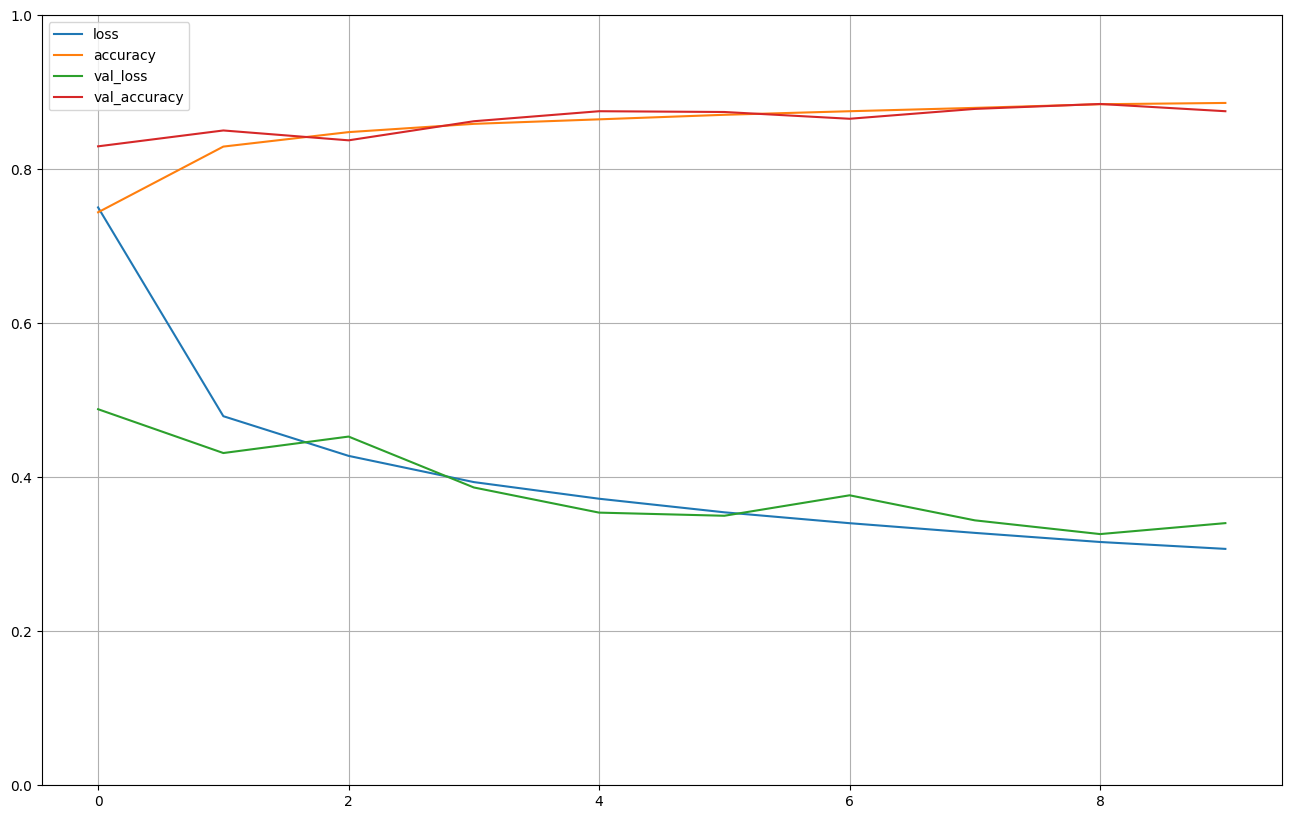

In [13]:
pd.DataFrame(history.history).plot(figsize = (16, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Evaluating the performance of the network is straight forward and follows data science best practice principles. We call the model’s evalute method on the test data set to see how it performs. Remember that the test data set hasn’t been used in training and the network hasn’t seen this data before. We should perform this step only once so we can get an accurate idea of the model’s performance.

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 49.2279 - accuracy: 0.8570


[49.227935791015625, 0.8569999933242798]